# Instalação de Pacotes

In [1]:
!pip install --quiet rdkit
!pip install --quiet ase
!pip install --quiet dscribe
!pip install --quiet optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.5 MB/s eta 0:00:00


# Carregamento Pacotes


In [2]:
import os
import zipfile

import numpy as np
import matplotlib.pyplot as plt

import optuna

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split

print(torch.__version__)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Executando em: {device}")

2.0.1+cu118
Executando em: cuda


In [3]:
torch.manual_seed(0)
torch.cuda.manual_seed_all(0)
np.random.seed(0)

# Carregamento do Conjunto de Dados (QM9)

## Dropbox link (Download)

In [4]:
!wget --no-check-certificate -O QM9.zip https://www.dropbox.com/scl/fi/lbs52lc0av3eqi9zws3wp/QM9.zip?rlkey=925vtuebvf7kf9ifq9143d6az&dl=0

zip_path = "/content/QM9.zip"
qm9_folder = "/content/QM9Data"
if not os.path.exists(qm9_folder):
    os.makedirs(qm9_folder)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(qm9_folder)

print(f"Dados salvos em: {qm9_folder}")


--2023-09-18 23:27:54--  https://www.dropbox.com/scl/fi/lbs52lc0av3eqi9zws3wp/QM9.zip?rlkey=925vtuebvf7kf9ifq9143d6az
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/e/scl/fi/lbs52lc0av3eqi9zws3wp/QM9.zip?rlkey=925vtuebvf7kf9ifq9143d6az [following]
--2023-09-18 23:27:54--  https://www.dropbox.com/e/scl/fi/lbs52lc0av3eqi9zws3wp/QM9.zip?rlkey=925vtuebvf7kf9ifq9143d6az
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9edcd3f9ed86517272e67117b3.dl.dropboxusercontent.com/cd/0/inline/CD_XIlMctznB-wxb-eYo0yFOpdJkRmPfWpt6tj-1J30Op6VgenPThcTvzPLmFzMU-MAUXWezHH4jCuUQ3uMixILwC-q_bhcryAotebhbR0rRZtrCv4jXbbH8NN4a6bzwYZg/file# [following]
--2023-09-18 23:27:55--  https://uc9edcd3f9ed86517272e67117b3.dl.dropboxusercontent.com/cd

# Extração e Preparação dos Dados


In [5]:
with open(qm9_folder+"/dsgdb9nsd_075700.xyz") as file:
    for line in file:
        print(line)

16

gdb 75700	2.29421	2.10153	1.19281	1.5927	71.76	-0.2569	-0.021	0.2359	1002.3496	0.125963	-434.09168	-434.083979	-434.083035	-434.123886	28.894	

C	 0.0082723652	 1.4385040241	 0.0216304465	-0.368015

N	-0.0080626856	-0.0080486441	-0.0143324088	-0.128223

C	-0.0025221437	-0.7715337629	-1.1909538518	 0.388126

N	 0.0263387403	-0.3906951642	-2.3959782595	-0.532716

N	-0.0435539427	-2.1606959554	-0.8372214133	-0.113662

C	 1.1983737221	-2.6000297832	-0.1756188576	-0.242408

C	 0.0113061798	-2.2080435108	 0.6349537932	-0.162296

C	-0.0270216144	-0.7926214222	 1.1346516211	 0.42506

O	-0.0955434019	-0.3870203764	 2.2694066024	-0.371241

H	 0.9216696532	 1.8340504971	-0.4354195835	 0.141444

H	-0.8595819793	 1.8482562075	-0.5050019382	 0.146272

H	-0.0319704226	 1.7357251605	 1.0706204257	 0.173704

H	 0.0660884133	 0.6248858104	-2.4690959743	 0.222945

H	 1.4244948343	-3.6539669067	-0.2978095694	 0.14517

H	 2.0547706395	-1.9318987311	-0.1997156332	 0.140887

H	-0.5885282877	-2.9489560327

In [6]:
def load_qm9_xyz(file_path):
    """Load a single QM9.xyz file."""
    with open(file_path, 'r') as f:
        # Number of atoms
        natoms = int(f.readline())
        # Properties are in the second line
        properties = list(map(float, f.readline().split()[2:]))
        # Read atomic coordinates and types
        atoms = []
        coordinates = []
        # print(properties)
        for num_line, line in enumerate(f):
            # print(num_line, line)
            if num_line >= 0 and num_line < natoms:
                info = line.replace("*^","e").split()
                atoms.append(info[0])
                coordinates.append(list(map(float, info[1:-1])))

    return {
        "natoms": natoms,
        "atoms": atoms,
        "coordinates": np.array(coordinates),
        "properties": properties
    }

def load_qm9_dataset(directory_path, list_mols=[]):
    """Load the entire QM9 dataset from a directory containing .xyz files."""
    X = []
    Y = []
    S = []
    for file_name in os.listdir(directory_path):
        if file_name.endswith(".xyz"):
            file_path = os.path.join(directory_path, file_name)
            molecule_data = load_qm9_xyz(file_path)
            if molecule_data['natoms'] in list_mols or len(list_mols)==0:
              X.append([molecule_data['atoms'], molecule_data['coordinates']])
              Y.append(molecule_data['properties'])
              S.append(molecule_data['natoms'])
    return X, Y, S

In [7]:
# Loading
# segundo parâmetro: lista com o tamanho das moléculas desejadas | [] para selecionar todas]
XYZ, Y, natoms = load_qm9_dataset(qm9_folder)
Y = np.array(Y)

samples =  len(XYZ)
print(f"Numero Moléculas: {samples}")
print(f"Primeira Molécula: {XYZ[0]}")
print(f"Propriedades Mol[0]: {Y[0]}")


Numero Moléculas: 133885
Primeira Molécula: [['O', 'C', 'C', 'C', 'N', 'C', 'C', 'C', 'N', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H'], array([[ 0.24257585,  1.32388969,  0.24701474],
       [ 0.0476653 , -0.0440544 ,  0.0679647 ],
       [-1.44165642, -0.55954999,  0.0052019 ],
       [-2.47170141,  0.53740874, -0.30037786],
       [-1.91910154,  0.60521928, -1.68023102],
       [-1.26779903, -0.71909899, -1.53427424],
       [ 0.27303556, -0.59556752, -1.40282132],
       [ 0.98024384,  0.24134257, -2.35231204],
       [ 1.5260127 ,  0.9239831 , -3.10934342],
       [-0.18451694,  1.77802083, -0.4932051 ],
       [ 0.66318403, -0.54748135,  0.81569583],
       [-1.69876068, -1.37167214,  0.68196289],
       [-3.50030334,  0.15823072, -0.24421804],
       [-2.40058088,  1.47158411,  0.26552362],
       [-2.57939962,  0.70280537, -2.44096466],
       [-1.67628136, -1.54041677, -2.12776416],
       [ 0.73705348, -1.58643094, -1.36372309]])]
Propriedades Mol[0]: [ 2.82446000e+00  1.49113000e

In [8]:
natoms = np.array(natoms)
min_atoms = np.min(natoms)
max_atoms = np.max(natoms)
print(f"Menor Molécula: {min_atoms}")
print(f"Maior Molécula: {max_atoms}")

Menor Molécula: 3
Maior Molécula: 29


# Geração dos Descritores (DScribe)

- Matriz de Coulomb (CM)
- Atom-centered Symmetry Functions (ACSF)
- Smooth Overlap of Atomic Positions (SOAP)
- Many-body Tensor Representation (MBTR)


In [9]:
from ase import Atoms

In [10]:
from dscribe.descriptors import CoulombMatrix, ACSF, SOAP, MBTR

mols = [Atoms(positions=coordinates, symbols=symbols) for (symbols, coordinates) in XYZ]

# informa o tipo de descritor selecionado
descriptor = 'CM' # CM, SOAP, MBTR, ACSF

## Matriz de Coulomb (CM)

In [11]:
if descriptor == 'CM':
    cm = CoulombMatrix(n_atoms_max=max_atoms, permutation="eigenspectrum")
    X = cm.create(mols)
    print(X.shape)

(133885, 29)


## Atom-centered Symmetry Functions (ACSF)

---



In [12]:
if descriptor == 'ACSF':
    acsf = ACSF(
        species=["H", "C", "O", "N", "F"],
        r_cut=6.0,
        g2_params=[[1, 1], [1, 2], [1, 3]],
        g4_params=[[1, 1, 1], [1, 2, 1], [1, 1, -1], [1, 2, -1]],
    )
    centers = samples*[[0]]
    X = acsf.create(mols, centers).reshape([samples,-1])
    print(X.shape)

## Smooth Overlap of Atomic Positions (SOAP)

In [13]:
if descriptor == 'SOAP':
    soap = SOAP(
        species=["H", "C", "O", "N", "F"],
        periodic=False,
        r_cut=6.0,
        n_max=8,
        l_max=6,
    )

    centers = samples*[[0]]
    X = soap.create(mols, centers).reshape([samples, -1])
    print(X.shape)

## Many-body Tensor Representation (MBTR)

In [14]:
if descriptor == 'MBTR':
  mbtr = MBTR(
      species=["H", "C", "O", "N", "F"],
      geometry={"function": "distance"},
      grid={"min": 0.4, "max": 8, "sigma": 0.1, "n": 100},
      periodic=False,
      sparse=False,
      normalization="l2",
  )

  X = mbtr.create(mols)
  print(X.shape)

# Preparação dos Dados


In [15]:
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state=0)

**Q9 Dataset: Propriedades**

0. Rotational constant A: GHz
1. Rotational constant B: GHz
2. Rotational constant C: GHz
3. Dipole moment (μ): Debye (D)
4. Isotropic polarizability (α): atomic units (a.u.)
5. Energy of HOMO (ϵHOMO): Hartree (Ha)
6. Energy of LUMO (ϵLUMO): Hartree (Ha)
7. Gap (ϵgap): Hartree (Ha)
8. Electronic spatial extent: atomic units (a.u.)
9. Zero point vibrational energy (zpve): Hartree (Ha)
10. Internal energy at 0 K (U0): Hartree (Ha)
11. Internal energy at 298.15 K (U): Hartree (Ha)
12. Enthalpy at 298.15 K (H): Hartree (Ha)
13. Free energy at 298.15 K (G): Hartree (Ha)
15. Heat capacity at 298.15 K (Cv): cal/mol·K



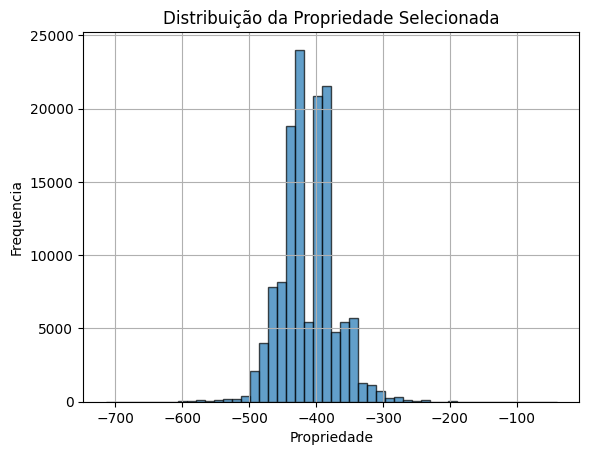

In [16]:
# Seleção da propriedade alvo
att_alvo = 10 # 15 propriedades [0-14]
Ys = Y[:,att_alvo].reshape(-1,1)
plt.hist(Y[:,att_alvo], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Propriedade')
plt.ylabel('Frequencia')
plt.title('Distribuição da Propriedade Selecionada')
plt.grid(True)
plt.show()


In [17]:
# Normalização, Split, DataLoader
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xn = scaler.fit_transform(X)

In [18]:
class Data(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.from_numpy(self.data[idx]).float(), torch.from_numpy(self.targets[idx]).float()

dataset = Data(Xn,Ys)

In [19]:
batch_size = 256

train_len = int(0.8 * len(dataset))
val_len = int(0.1 * len(dataset))
test_len = len(dataset) - train_len - val_len

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_len, val_len, test_len])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Rede Neural


## Modelo (Pytorch)

In [20]:
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim, layers, lr=0.001):
        super(MLP, self).__init__()
        all_layers = []
        prev_dim = input_dim

        # Camadas ocultas
        for layer_dim in layers:
            all_layers.append(nn.Linear(prev_dim, layer_dim))
            all_layers.append(nn.ReLU())
            prev_dim = layer_dim

        # Camada de saída (ativação linear - regressão)
        all_layers.append(nn.Linear(prev_dim, output_dim))

        # Combinando as camadas
        self.layers = nn.Sequential(*all_layers)

        self.criterion = nn.L1Loss() #nn.MSELoss()
        self.optimizer = optim.Adam(self.parameters(), lr=lr)

    def forward(self, x):
        return self.layers(x)

    def train_model(self, dataloader):
        self.train()
        total_loss = 0
        for batch_x, batch_y in dataloader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            self.optimizer.zero_grad()
            outputs = self(batch_x)
            loss = self.criterion(outputs, batch_y)
            loss.backward()
            self.optimizer.step()
            total_loss += loss.item()
        return total_loss / len(dataloader)

    def validate_model(self, dataloader):
        self.eval()
        total_loss = 0
        with torch.no_grad():
            for batch_x, batch_y in dataloader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)
                outputs = self(batch_x)
                loss = self.criterion(outputs, batch_y)
                total_loss += loss.item()
        return total_loss / len(dataloader)

    def test_model(self, dataloader):
        self.eval()
        predictions = []
        targets = []
        total_loss = 0
        with torch.no_grad():
            for batch_x, batch_y in dataloader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)
                outputs = self(batch_x)
                loss = self.criterion(outputs, batch_y)
                total_loss += loss.item()
                predictions.extend(outputs.cpu().tolist())
                targets.extend(batch_y.cpu().tolist())
        return predictions, targets, total_loss / len(dataloader)

    def predict(self, dataloader):
        self.eval()
        predictions = []
        with torch.no_grad():
            for batch_x, _ in dataloader:
                batch_x = batch_x.to(device)
                outputs = self(batch_x)
                predictions.extend(outputs.cpu().tolist())
        return predictions

In [21]:
class EarlyStopping:
    def __init__(self, patience=5, verbose=False, delta=0):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
            verbose (bool): If True, prints a message for each validation loss improvement.
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = float('inf')
        self.delta = delta

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decreases.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss


## Treinamento

Época 10/1000, Train Loss: 6.5931, Validation Loss: 5.4009
Época 20/1000, Train Loss: 0.3418, Validation Loss: 0.3286
Época 30/1000, Train Loss: 0.1837, Validation Loss: 0.2162
Época 40/1000, Train Loss: 0.1639, Validation Loss: 0.1776
Época 50/1000, Train Loss: 0.1675, Validation Loss: 0.2215
Early stopping


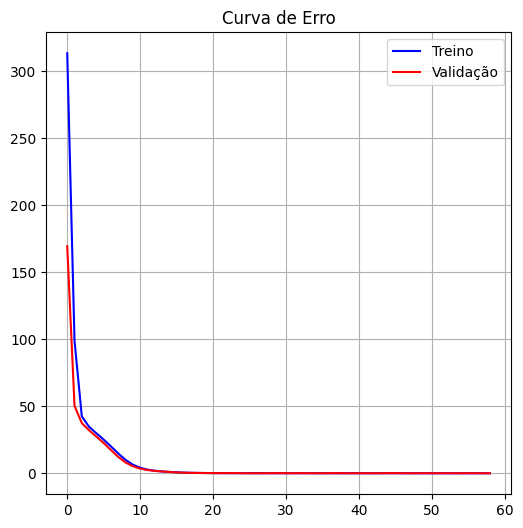

In [26]:
num_epochs = 1000
learning_rate = 0.001
# Definição do Modelo
model = MLP(input_dim=X.shape[1], output_dim=1, layers=[180], lr=learning_rate).to(device)

# Early Stop
early_stopping = EarlyStopping(patience=20, verbose=False)

tloss = []
vloss = []
for epoch in range(num_epochs):
    train_loss = model.train_model(train_loader)
    val_loss = model.validate_model(val_loader)
    tloss.append(train_loss)
    vloss.append(val_loss)
    if (epoch+1) % 10 == 0:
        print(f"Época {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
    early_stopping(val_loss, model)
    if early_stopping.early_stop:
        print("Early stopping")
        break

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("Curva de Erro")
ax.plot(tloss,'blue', label='Treino')
ax.plot(vloss,'red', label='Validação')
ax.legend()
ax.grid(True)
plt.show()


Erro de predição (MAE) no conjunto de teste: 0.18303357486454946


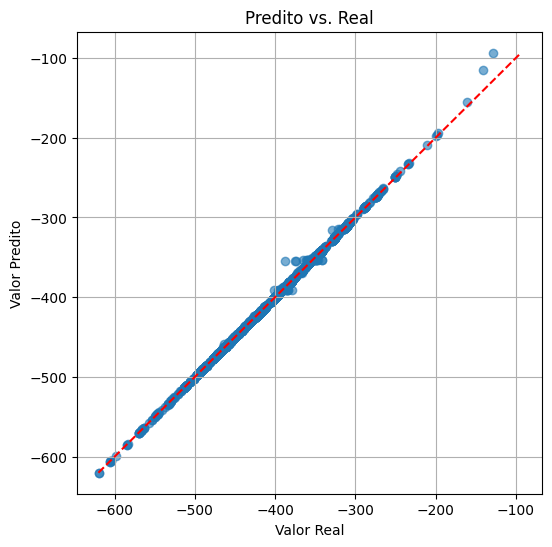

In [27]:
Yp, Yt, loss_test = model.test_model(test_loader)

plt.figure(figsize=(6, 6))
plt.scatter(Yp, Yt, alpha=0.6)

max_val = max(max(Yt), max(Yp))
min_val = min(min(Yt), min(Yp))
plt.plot([min_val, max_val], [min_val, max_val], 'r', linestyle='--')

plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Predito vs. Real')
plt.grid(True)

print(f"Erro de predição (MAE) no conjunto de teste: {loss_test}")

plt.show()



# Otimizando os Hiperparâmetros

## Função Objetivo Optuna

In [24]:
def objective(trial):
    early_stopping = EarlyStopping(patience=7, verbose=False)
    # lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    lr = 0.001
    n_layers = trial.suggest_int('n_layers', 1, 3)
    layers = []
    for i in range(n_layers):
        layers.append(trial.suggest_int(f'n_units_l{i+1}', 20, 400, 20))

    model = MLP(input_dim=X.shape[1], output_dim=1, layers=layers, lr=lr).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    for epoch in range(2000): # máximo épocas
        train_loss = model.train_model(train_loader)
        val_loss = model.validate_model(val_loader)
        early_stopping(val_loss, model)
        if early_stopping.early_stop:
            break
    return val_loss


## Otimização

**Cuidado:** O custo computacional pode ser elevado

In [25]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

print('Número de tentativas: ', len(study.trials))
print('Melhor Resultado:')
trial = study.best_trial

print('MAE: ', trial.value)
print('Hiperparâmetros: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')


[I 2023-09-18 23:32:14,365] A new study created in memory with name: no-name-179e6fd2-8961-47b1-80ba-703aab076ba5
[I 2023-09-18 23:32:53,119] Trial 0 finished with value: 1.8976233230446868 and parameters: {'n_layers': 3, 'n_units_l1': 220, 'n_units_l2': 220, 'n_units_l3': 80}. Best is trial 0 with value: 1.8976233230446868.
[I 2023-09-18 23:33:32,242] Trial 1 finished with value: 0.5949354644091625 and parameters: {'n_layers': 2, 'n_units_l1': 260, 'n_units_l2': 80}. Best is trial 1 with value: 0.5949354644091625.
[I 2023-09-18 23:34:49,437] Trial 2 finished with value: 0.9790772716954069 and parameters: {'n_layers': 2, 'n_units_l1': 400, 'n_units_l2': 140}. Best is trial 1 with value: 0.5949354644091625.
[I 2023-09-18 23:35:59,318] Trial 3 finished with value: 0.2185965081993139 and parameters: {'n_layers': 1, 'n_units_l1': 360}. Best is trial 3 with value: 0.2185965081993139.
[I 2023-09-18 23:37:32,587] Trial 4 finished with value: 0.17391846202454478 and parameters: {'n_layers': 1,

Número de tentativas:  10
Melhor Resultado:
MAE:  0.15215822927794367
Hiperparâmetros: 
    n_layers: 1
    n_units_l1: 180


# Experimentos (Sugestões)





1.   Desenvolver um modelo para outra propriedade do QM9 (ajustar os hiperparâmetros do modelo)
2.   Selecionar outro descritor e avaliar o impacto na predição (não usar o SOAP - limitação da memó
